# Clustering Crypto

In [6]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
# import hvplot.pandas
# import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [7]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [18]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.
from pathlib import Path
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df.head(10)


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [23]:
# Experimenting with Json
r = requests.get(url)
data = r.json()

In [24]:
list(data.keys())

['Response',
 'Message',
 'Data',
 'BaseImageUrl',
 'BaseLinkUrl',
 'RateLimit',
 'HasWarning',
 'Type']

In [32]:
# Create a DataFrame
crypto_df.rename(columns={"Unnamed: 0": "Coin"}, inplace=True)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [33]:
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [34]:
crypto_df.set_index('Coin', inplace=True)


KeyError: "None of ['Coin'] are in the columns"

In [30]:
crypto_df.describe()

,TotalCoinsMined
count,7.440000e+02
mean,3.883103e+09
std,3.867263e+10
min,-5.917978e+09
25%,6.322164e+05
50%,1.340427e+07
75%,9.399895e+07
max,9.899887e+11


In [36]:
crypto_df.shape

(1252, 6)

In [38]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [39]:
crypto_df['Algorithm'].value_counts().sum()

1252

In [40]:
crypto_df['Algorithm'].value_counts().sort_index()

1GB AES Pattern Search      1
536                         2
Argon2                      2
Argon2d                     1
Avesta hash                 1
BLAKE256                    2
Blake                       8
Blake2S                     4
Blake2b                     3
C11                         2
Cloverhash                  1
Counterparty                1
CryptoNight                40
CryptoNight Heavy           3
CryptoNight Heavy X         1
CryptoNight-Lite            1
CryptoNight-V7              6
CryptoNight-lite            1
Cryptonight-GPU             1
Curve25519                  2
DPoS                       19
Dagger                      4
Dagger-Hashimoto            1
ECC 256K1                   1
Equihash                   26
Equihash+Scrypt             1
Equihash1927                1
Ethash                     18
Exosis                      1
Green Protocol              1
Groestl                     5
HMQ1725                     2
HybridScryptHash256         1
IMesh     

### Data Preprocessing

In [41]:
# Keep only necessary columns:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
col_list = ['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply']
crypto_df1 = crypto_df[col_list]
crypto_df1.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [45]:
# Keep only cryptocurrencies that are trading
crypto_df1['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [50]:
# Keep only cryptocurrencies with a working algorithm
crypto_df2 = crypto_df1[crypto_df1['IsTrading'] == True]

In [51]:
# Remove the "IsTrading" column
crypto_df2['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

# Keep only cryptocurrencies with a working algorithm
It seems like the algorithims are working....

In [53]:
# One more for fun...Looks like its also working....
crypto_df3 = crypto_df2.drop(columns=['IsTrading'])
crypto_df3.head()
len(crypto_df3)

1144

In [54]:
crypto_df3 = crypto_df2.drop(columns=['IsTrading'])
crypto_df3.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [56]:
# Remove rows with at least 1 null value. df4 iteration
crypto_df4 = crypto_df3.dropna()
crypto_df4.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [58]:
# check for dropped null values. new output df4
len(crypto_df4)

685

In [59]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df5 = crypto_df4[crypto_df4['TotalCoinsMined'] > 0]
crypto_df5.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [60]:
# Check new values in df 
len(crypto_df5)

532

In [61]:
# Drop rows where there are 'N/A' text values
crypto_df6 = crypto_df5[~crypto_df5['TotalCoinSupply'].str.contains('N/A')]
crypto_df6.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [62]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
crypto_df6.info()


<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


In [63]:
# Store the new df as d6 
crypto_df6['TotalCoinSupply'] = crypto_df6['TotalCoinSupply'].astype(float)
crypto_df6.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethereum,Ethash,PoW,1.076842e+08,0.000000e+00


In [64]:
# Check the new df 
len(crypto_df6)

532

In [65]:
# Verify the dataframe 
crypto_df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(3)
memory usage: 24.9+ KB


In [66]:
# Store the new df 
coin_df = crypto_df6['CoinName'].to_frame()
coin_df.head()

,CoinName
Coin,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [67]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df7 = crypto_df6.drop(columns=['CoinName'])
crypto_df7.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethash,PoW,1.076842e+08,0.000000e+00


In [68]:
# check df 7
crypto_df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [69]:
# Create dummy variables for text features and encode
crypto_enc = pd.get_dummies(crypto_df7)
crypto_enc.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,Algorithm_PHI1612,Algorithm_POS 2.0,Algorithm_POS 3.0,Algorithm_PoS,Algorithm_Proof-of-Authority,Algorithm_Proof-of-BibleHash,Algorithm_QUAIT,Algorithm_QuBit,Algorithm_Quark,Algorithm_SHA-256,Algorithm_SHA-256 + Hive,Algorithm_SHA-256D,Algorithm_SHA-512,Algorithm_SHA3,Algorithm_Scrypt,Algorithm_Semux BFT consensus,Algorithm_Shabal256,Algorithm_Skein,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW and PoS,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Coin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
# Standardize data
crypto_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    float64
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorithm_Cr

In [71]:
# Not in Directions, but you need to import the sklearn for preprocessing.
from sklearn import preprocessing

# Code Commands to standardize data
scaler = preprocessing.StandardScaler().fit(crypto_enc)
crypto_enc_scaled = scaler.transform(crypto_enc)

In [72]:
# Code Commands to encode scaled data
crypto_enc_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Reducing Dimensions Using PCA

In [73]:
# Use PCA to reduce dimensions to 3 principal components
# Initialize PCA model
pca = PCA(n_components=3, random_state=0)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_enc_scaled)

In [74]:
# Check output of previous commands by typing your user defined variable
crypto_pca

array([[-0.33362577,  1.0175199 , -0.60146434],
       [-0.31696777,  1.01768948, -0.60179865],
       [ 2.29228702,  1.67857377, -0.59100499],
       ...,
       [ 0.32325767, -2.28981908,  0.40853234],
       [-0.17069834, -2.06444629,  0.41985608],
       [-0.27295183,  0.82636104, -0.25513213]])

In [75]:
# Create a DataFrame with the principal components data
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.333626,1.017520,-0.601464
1,-0.316968,1.017689,-0.601799
2,2.292287,1.678574,-0.591005
3,-0.150938,-1.321564,0.162901
4,-0.153628,-2.070344,0.362245


In [ ]:
df_crypto_pca.set_index(keys=coin_df.index, inplace=True)

In [76]:
# View what is in the df
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.333626,1.017520,-0.601464
1,-0.316968,1.017689,-0.601799
2,2.292287,1.678574,-0.591005
3,-0.150938,-1.321564,0.162901
4,-0.153628,-2.070344,0.362245


In [77]:
# display the explained variance
pca.explained_variance_ratio_

array([0.02793039, 0.02141454, 0.02049171])

In [78]:
sum(pca.explained_variance_ratio_)

0.06983664017987937

### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [79]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

###################need help here: Create the Elbow Curve using hvPlot

#elbow_data = {"k": k, "inertia": inertia}
#df_elbow = pd.DataFrame(elbow_data)
#df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")


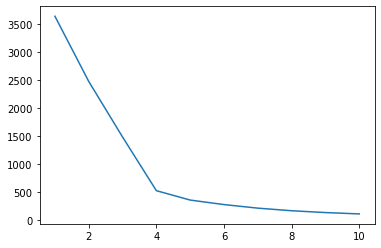

In [82]:
# test line graph...well something displayed....
plt.plot(k, inertia);

In [83]:
# Initialize the K-Means model
model = KMeans(n_clusters=5, random_state=0)


# Fit the model
model.fit(df_crypto_pca)



# Predict clusters
predictions = model.predict(df_crypto_pca)


# Create a new DataFrame including predicted clusters and cryptocurrencies features
df_crypto_pca_k = df_crypto_pca.copy(deep=True)
df_crypto_pca_k["class"] = model.labels_
df_crypto_pca_k.head()



######concat_df = pd.DataFrame(crypto_df7[["Algorithm", "ProofType", "TotalCoinsMined", "TotalCoinSupply"]])
#clustered_df=pd.concat([concat_df.reset_index(drop=True), df_crypto_pca_k[['PC 1', 'PC 2', 'PC 3']].reset_index()], axis=1)

,principal component 1,principal component 2,principal component 3,class
0,-0.333626,1.017520,-0.601464,0
1,-0.316968,1.017689,-0.601799,0
2,2.292287,1.678574,-0.591005,4
3,-0.150938,-1.321564,0.162901,3
4,-0.153628,-2.070344,0.362245,3


Running K-Means with `k=<your best value for k here>`

In [84]:
# Lets see what the predictions are...
predictions

array([0, 0, 4, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 4,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 4, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 3, 4, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0,

In [85]:
# Labels 
model.labels_

array([0, 0, 4, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 4,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 4, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 3, 4, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0,

In [86]:
# Lets see what df6 is doing 
crypto_df6.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethereum,Ethash,PoW,1.076842e+08,0.000000e+00


In [87]:
concat_df = pd.concat([crypto_df6,df_crypto_pca_k], axis =1 )

In [88]:
df_crypto_pca_k.shape

(532, 4)

In [89]:
## WHY ALL THE NANsssss???
concat_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class
0,NaN,NaN,NaN,NaN,NaN,-0.333626,1.017520,-0.601464,0.0
1,NaN,NaN,NaN,NaN,NaN,-0.316968,1.017689,-0.601799,0.0
2,NaN,NaN,NaN,NaN,NaN,2.292287,1.678574,-0.591005,4.0
3,NaN,NaN,NaN,NaN,NaN,-0.150938,-1.321564,0.162901,3.0
4,NaN,NaN,NaN,NaN,NaN,-0.153628,-2.070344,0.362245,3.0


In [90]:
concat_df['class'].value_counts()

0.0    278
3.0    233
4.0     15
1.0      5
2.0      1
Name: class, dtype: int64

In [91]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 0 to ZYD
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CoinName               532 non-null    object 
 1   Algorithm              532 non-null    object 
 2   ProofType              532 non-null    object 
 3   TotalCoinsMined        532 non-null    float64
 4   TotalCoinSupply        532 non-null    float64
 5   principal component 1  532 non-null    float64
 6   principal component 2  532 non-null    float64
 7   principal component 3  532 non-null    float64
 8   class                  532 non-null    float64
dtypes: float64(6), object(3)
memory usage: 83.1+ KB


In [92]:
concat_df['class'].value_counts()

0.0    278
3.0    233
4.0     15
1.0      5
2.0      1
Name: class, dtype: int64

### Visualizing Results

#### 3D-Scatter with Clusters

In [94]:
# Create a 3D-Scatter with the PCA data and the clusters
# Create a 3D-Scatter with the PCA data and the clusters
# Plotting the clusters
# df_crypto_pca_k.hvplot.scatter(
#     x="principal component 1",
#     y="principal component 2",
#     z="principal component 3",
#     hover_cols=["class"], --- CoinName.
#     by="class",
# )

#df_crypto_pca_k = px.data.iris()
#  ERRROOORRR - PX IS NOT DEFINED>>>>>WYHY?
fig = px.scatter_3d(concat_df, x='principal component 1', y='principal component 2', z='principal component 3',
              color='class', hover_name="CoinName", hover_data=["Algorithm"],)
fig.show()

NameError: name 'px' is not defined

In [95]:
!conda list plotly

# packages in environment at /Users/elizabethcomstock/opt/anaconda3/envs/nlp:
#
# Name                    Version                   Build  Channel


#### Table of Tradable Cryptocurrencies

In [97]:
# Table with tradable cryptos ###EROORR WITH HV PLOT....not importing maybe?
#coin_df.head()
concat_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined','class'], 
                       sortable=True, selectable=True)

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [99]:
# Print the total number of tradable cryptocurrencies
# Print the total number of tradable cryptocurrencies
print('Total number of tradeable cryptocurrencies: ', len(concat_df))


Total number of tradeable cryptocurrencies:  1064


In [100]:
concat_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class
0,NaN,NaN,NaN,NaN,NaN,-0.333626,1.017520,-0.601464,0.0
1,NaN,NaN,NaN,NaN,NaN,-0.316968,1.017689,-0.601799,0.0
2,NaN,NaN,NaN,NaN,NaN,2.292287,1.678574,-0.591005,4.0
3,NaN,NaN,NaN,NaN,NaN,-0.150938,-1.321564,0.162901,3.0
4,NaN,NaN,NaN,NaN,NaN,-0.153628,-2.070344,0.362245,3.0


In [101]:
crypto_df6.head()
crypto_trd_df = concat_df.drop(columns=['CoinName', 'Algorithm', 'ProofType'])
crypto_trd_df.head()

,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class
0,NaN,NaN,-0.333626,1.017520,-0.601464,0.0
1,NaN,NaN,-0.316968,1.017689,-0.601799,0.0
2,NaN,NaN,2.292287,1.678574,-0.591005,4.0
3,NaN,NaN,-0.150938,-1.321564,0.162901,3.0
4,NaN,NaN,-0.153628,-2.070344,0.362245,3.0


In [102]:
# Scale data to create the scatter plot
crypto_trd = StandardScaler().fit_transform(crypto_trd_df)
crypto_trd

array([[        nan,         nan, -0.20165457,  0.70238545, -0.42443161,
        -0.9419422 ],
       [        nan,         nan, -0.19158591,  0.7025025 , -0.42466752,
        -0.9419422 ],
       [        nan,         nan,  1.3855349 ,  1.15870538, -0.41705083,
         1.67483718],
       ...,
       [-0.11545006, -0.14917608,         nan,         nan,         nan,
                nan],
       [-0.11670149, -0.15255998,         nan,         nan,         nan,
                nan],
       [-0.11697125, -0.15272643,         nan,         nan,         nan,
                nan]])

In [103]:
df_crypto_trd = pd.DataFrame(
    data=crypto_trd, columns=["TotalCoinsMined", "TotalCoinSupply", "principal component 1", "principal component 2", "principal component 3", "class"])
df_crypto_trd.head()

,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class
0,NaN,NaN,-0.201655,0.702385,-0.424432,-0.941942
1,NaN,NaN,-0.191586,0.702503,-0.424668,-0.941942
2,NaN,NaN,1.385535,1.158705,-0.417051,1.674837
3,NaN,NaN,-0.091232,-0.912265,0.114953,1.020642
4,NaN,NaN,-0.092858,-1.429141,0.255623,1.020642


In [104]:
df_crypto_trd.set_index(keys=coin_df.index, inplace=True)

ValueError: Length mismatch: Expected 1064 rows, received array of length 532

In [105]:
df_crypto_trd.head()

,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class
0,NaN,NaN,-0.201655,0.702385,-0.424432,-0.941942
1,NaN,NaN,-0.191586,0.702503,-0.424668,-0.941942
2,NaN,NaN,1.385535,1.158705,-0.417051,1.674837
3,NaN,NaN,-0.091232,-0.912265,0.114953,1.020642
4,NaN,NaN,-0.092858,-1.429141,0.255623,1.020642


In [106]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
df_crypto_trd.hvplot.scatter(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
#    z="principal component 3",
    hover_cols=["Coin"]
#    by="Coin"
)

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [107]:
crypto_df6.head()
crypto_trd_df2 = crypto_df6.drop(columns=['CoinName', 'Algorithm', 'ProofType'])
crypto_trd_df2.head()

,TotalCoinsMined,TotalCoinSupply
Coin,,
42,4.199995e+01,4.200000e+01
404,1.055185e+09,5.320000e+08
1337,2.927942e+10,3.141593e+11
BTC,1.792718e+07,2.100000e+07
ETH,1.076842e+08,0.000000e+00


#### Scatter Plot with Tradable Cryptocurrencies

In [ ]:
# Scale data to create the scatter plot


In [ ]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
